In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

 
# Purchase Order Data Analysis

This notebook contains the analysis of purchase order data from 2012 to 2015. The data includes various details about purchase orders, such as creation and purchase dates, fiscal years, supplier information, item details, and prices. The goal of this analysis is to clean, preprocess, and explore the data to gain insights and identify patterns.

## Table of Contents

1. [Import Libraries](#import-libraries)
2. [Load Data](#load-data)
3. [Data Overview](#data-overview)
4. [Data Cleaning](#data-cleaning)
5. [Exploratory Data Analysis](#exploratory-data-analysis)

## 1. Import Libraries <a id="import-libraries"></a>

We start by importing the necessary libraries for data manipulation, visualization, and machine learning.

## 2. Load Data <a id="load-data"></a>

We load the purchase order data from a CSV file into a pandas DataFrame.

## 3. Data Overview <a id="data-overview"></a>

We take a first look at the data to understand its structure and content. This includes displaying the first few rows, checking the data types, and summarizing the data.

## 4. Data Cleaning <a id="data-cleaning"></a>

We clean the data by handling missing values, converting data types, and preprocessing text and numerical columns.

## 5. Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

We perform exploratory data analysis to uncover patterns and insights in the data. This includes visualizing distributions, relationships, and trends.


In [2]:
df = pd.read_csv(r"C:\Users\Arshad.irfan\Desktop\My Project\New folder\archive\PURCHASE ORDER DATA EXTRACT 2012-2015_0.csv")

In [3]:
df.head()

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,08/27/2013,NaN,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,NaN,WSCA/Coop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/29/2014,NaN,2013-2014,NaN,REQ0011932,REQ0011932,NON-IT Goods,NaN,Informal Competitive,NaN,...,76121504,76121504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/01/2013,NaN,2013-2014,NaN,REQ0011476,REQ0011476,IT Services,NaN,Informal Competitive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95841\n(38.662263, -121.346136)"
3,06/13/2014,06/05/2014,2013-2014,NaN,4500236642,NaN,NON-IT Goods,NaN,Informal Competitive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91436\n(34.151642, -118.49051)"
4,03/12/2014,03/12/2014,2013-2014,1-10-75-60A,4500221028,NaN,NON-IT Goods,NaN,Statewide Contract,NaN,...,44103127,44103127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95814\n(38.580427, -121.494396)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Creation Date            346018 non-null  object 
 1   Purchase Date            328582 non-null  object 
 2   Fiscal Year              346018 non-null  object 
 3   LPA Number               92345 non-null   object 
 4   Purchase Order Number    346018 non-null  object 
 5   Requisition Number       14369 non-null   object 
 6   Acquisition Type         346018 non-null  object 
 7   Sub-Acquisition Type     68337 non-null   object 
 8   Acquisition Method       346018 non-null  object 
 9   Sub-Acquisition Method   30896 non-null   object 
 10  Department Name          346018 non-null  object 
 11  Supplier Code            345982 non-null  float64
 12  Supplier Name            345982 non-null  object 
 13  Supplier Qualifications  141745 non-null  object 
 14  Supp

In [5]:
df.describe()

,Supplier Code,Quantity,Normalized UNSPSC,Class,Family,Segment
count,3.459820e+05,3.459880e+05,3.450010e+05,3.427230e+05,3.427230e+05,3.427230e+05
mean,8.434345e+05,2.316154e+03,4.932197e+07,4.927633e+07,4.927219e+07,4.913283e+07
std,2.461186e+06,1.058259e+05,2.246967e+07,2.246105e+07,2.246430e+07,2.246636e+07
min,0.000000e+00,1.000000e-04,3.018170e+05,1.010150e+07,3.018000e+06,1.000000e+07
25%,2.729200e+04,1.000000e+00,3.911171e+07,3.911160e+07,3.911000e+07,3.900000e+07
50%,1.012531e+06,1.000000e+00,4.412160e+07,4.412150e+07,4.412000e+07,4.400000e+07
75%,1.482180e+06,6.000000e+00,7.210151e+07,7.116110e+07,7.116000e+07,7.100000e+07
max,9.548318e+08,2.000000e+07,9.514190e+07,9.514190e+07,9.514000e+07,9.500000e+07


In [6]:
df.isnull().sum()

Creation Date                   0
Purchase Date               17436
Fiscal Year                     0
LPA Number                 253673
Purchase Order Number           0
Requisition Number         331649
Acquisition Type                0
Sub-Acquisition Type       277681
Acquisition Method              0
Sub-Acquisition Method     315122
Department Name                 0
Supplier Code                  36
Supplier Name                  36
Supplier Qualifications    204273
Supplier Zip Code           70110
CalCard                         0
Item Name                      32
Item Description              202
Quantity                       30
Unit Price                     30
Total Price                    30
Classification Codes         1017
Normalized UNSPSC            1017
Commodity Title              3295
Class                        3295
Class Title                  3295
Family                       3295
Family Title                 3295
Segment                      3295
Segment Title 

In [7]:
print(df['Fiscal Year'].unique())
print(df['Unit Price'].unique())
print(df['Total Price'].unique())

['2013-2014' '2014-2015' '2012-2013']
['$1.00' '$2.00' '$150.00' ... '$51268.60' '$37479.45' '$17455.91']
['$1.00' '$4.00' '$675.00' ... '$51268.60' '$37479.45' '$17455.91']


In [8]:
# Unit Price and Total Price: Remove dollar signs and commas, then convert to numeric
df['Unit Price'] = df['Unit Price'].replace('[\$,]', '', regex=True)
df['Total Price'] = df['Total Price'].replace('[\$,]', '', regex=True)

In [9]:
# Convert dates to datetime
df['Creation Date'] = pd.to_datetime(df['Creation Date'], errors='coerce')
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Convert Fiscal Year to category, extracting the first year from the range if applicable
df['Fiscal Year'] = df['Fiscal Year'].str.extract(r'(\d{4})', expand=False)
df['Fiscal Year'] = df['Fiscal Year'].astype('category')

# Convert numeric columns like Quantity, Unit Price, Total Price, Supplier Code, Normalized UNSPSC, Class, Family, Segment
numeric_cols = ['Quantity', 'Unit Price', 'Total Price', 'Supplier Code', 'Normalized UNSPSC', 'Class', 'Family', 'Segment']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Conversion for categorical columns
categorical_cols = ['Acquisition Type', 'Sub-Acquisition Type', 'Acquisition Method', 
                    'Sub-Acquisition Method', 'Department Name', 'Supplier Name', 
                    'Supplier Qualifications', 'CalCard', 'Item Name', 'Item Description',
                    'Classification Codes', 'Commodity Title', 'Class Title', 'Family Title', 
                    'Segment Title']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Keep identifiers and location columns as object types
df['LPA Number'] = df['LPA Number'].astype('object')
df['Purchase Order Number'] = df['Purchase Order Number'].astype('object')
df['Requisition Number'] = df['Requisition Number'].astype('object')
df['Supplier Zip Code'] = df['Supplier Zip Code'].astype('object')
df['Location'] = df['Location'].astype('object')

In [10]:
df.drop(['Requisition Number'], axis=1, inplace=True)

In [11]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Unit Price'].fillna(df['Unit Price'].median(), inplace=True)
df['Total Price'].fillna(df['Total Price'].median(), inplace=True)

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\1662940328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\1662940328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [12]:
df['Acquisition Method'].fillna(df['Acquisition Method'].mode()[0], inplace=True)

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\4244789235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Acquisition Method'].fillna(df['Acquisition Method'].mode()[0], inplace=True)


In [13]:
df['Purchase Date'].fillna(df['Creation Date'], inplace=True)

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\1637135457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchase Date'].fillna(df['Creation Date'], inplace=True)


In [14]:
df['Supplier Zip Code'].fillna('Unknown', inplace=True)
df['Supplier Name'].fillna('Unknown', inplace=True)

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\962410935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Supplier Zip Code'].fillna('Unknown', inplace=True)
C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\962410935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [15]:
df.isnull().sum()

Creation Date                   0
Purchase Date                   0
Fiscal Year                     0
LPA Number                 253673
Purchase Order Number           0
Acquisition Type                0
Sub-Acquisition Type       277681
Acquisition Method              0
Sub-Acquisition Method     315122
Department Name                 0
Supplier Code                  36
Supplier Name                   0
Supplier Qualifications    204273
Supplier Zip Code               0
CalCard                         0
Item Name                      32
Item Description              202
Quantity                        0
Unit Price                      0
Total Price                     0
Classification Codes         1017
Normalized UNSPSC            1017
Commodity Title              3295
Class                        3295
Class Title                  3295
Family                       3295
Family Title                 3295
Segment                      3295
Segment Title                3295
Location      

In [16]:
df.drop(['LPA Number'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Creation Date            346018 non-null  datetime64[ns]
 1   Purchase Date            346018 non-null  datetime64[ns]
 2   Fiscal Year              346018 non-null  category      
 3   Purchase Order Number    346018 non-null  object        
 4   Acquisition Type         346018 non-null  category      
 5   Sub-Acquisition Type     68337 non-null   category      
 6   Acquisition Method       346018 non-null  category      
 7   Sub-Acquisition Method   30896 non-null   category      
 8   Department Name          346018 non-null  category      
 9   Supplier Code            345982 non-null  float64       
 10  Supplier Name            346018 non-null  category      
 11  Supplier Qualifications  141745 non-null  category      
 12  Supplier Zip Cod

In [18]:
df.head()

,Creation Date,Purchase Date,Fiscal Year,Purchase Order Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,Department Name,Supplier Code,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,2013-08-27,2013-08-27,2013,REQ0011118,IT Goods,NaN,WSCA/Coop,NaN,"Consumer Affairs, Department of",1740272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-29,2014-01-29,2013,REQ0011932,NON-IT Goods,NaN,Informal Competitive,NaN,"Consumer Affairs, Department of",1760085.0,...,76121504,76121504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-01,2013-11-01,2013,REQ0011476,IT Services,NaN,Informal Competitive,NaN,"Consumer Affairs, Department of",17224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95841\n(38.662263, -121.346136)"
3,2014-06-13,2014-06-05,2013,4500236642,NON-IT Goods,NaN,Informal Competitive,NaN,Correctional Health Care Services,1754462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91436\n(34.151642, -118.49051)"
4,2014-03-12,2014-03-12,2013,4500221028,NON-IT Goods,NaN,Statewide Contract,NaN,"Corrections and Rehabilitation, Department of",1087660.0,...,44103127,44103127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95814\n(38.580427, -121.494396)"


In [19]:
# Add "Unknown" to the category columns if needed
categorical_columns_to_update = ['Sub-Acquisition Type', 'Sub-Acquisition Method', 'Item Name', 'Item Description', 
                                 'Supplier Qualifications', 'Commodity Title', 'Class Title', 'Family Title', 'Segment Title']

for col in categorical_columns_to_update:
    if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('Unknown')

# Fill missing values with "Unknown" for the specified columns
df['Sub-Acquisition Type'].fillna('Unknown', inplace=True)
df['Sub-Acquisition Method'].fillna('Unknown', inplace=True)
df['Item Name'].fillna('Unknown', inplace=True)
df['Item Description'].fillna('Unknown', inplace=True)
df['Supplier Qualifications'].fillna('Unknown', inplace=True)
df['Commodity Title'].fillna('Unknown', inplace=True)
df['Class Title'].fillna('Unknown', inplace=True)
df['Family Title'].fillna('Unknown', inplace=True)
df['Segment Title'].fillna('Unknown', inplace=True)

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2540490305.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub-Acquisition Type'].fillna('Unknown', inplace=True)
C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2540490305.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [20]:
df['Class'].fillna(df['Class'].median(), inplace=True)
df['Family'].fillna(df['Family'].median(), inplace=True)
df['Segment'].fillna(df['Segment'].median(), inplace=True)

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2948624867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].fillna(df['Class'].median(), inplace=True)
C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2948624867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [21]:
df.isnull().sum()

Creation Date                  0
Purchase Date                  0
Fiscal Year                    0
Purchase Order Number          0
Acquisition Type               0
Sub-Acquisition Type           0
Acquisition Method             0
Sub-Acquisition Method         0
Department Name                0
Supplier Code                 36
Supplier Name                  0
Supplier Qualifications        0
Supplier Zip Code              0
CalCard                        0
Item Name                      0
Item Description               0
Quantity                       0
Unit Price                     0
Total Price                    0
Classification Codes        1017
Normalized UNSPSC           1017
Commodity Title                0
Class                          0
Class Title                    0
Family                         0
Family Title                   0
Segment                        0
Segment Title                  0
Location                   70110
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Creation Date            346018 non-null  datetime64[ns]
 1   Purchase Date            346018 non-null  datetime64[ns]
 2   Fiscal Year              346018 non-null  category      
 3   Purchase Order Number    346018 non-null  object        
 4   Acquisition Type         346018 non-null  category      
 5   Sub-Acquisition Type     346018 non-null  category      
 6   Acquisition Method       346018 non-null  category      
 7   Sub-Acquisition Method   346018 non-null  category      
 8   Department Name          346018 non-null  category      
 9   Supplier Code            345982 non-null  float64       
 10  Supplier Name            346018 non-null  category      
 11  Supplier Qualifications  346018 non-null  category      
 12  Supplier Zip Cod

EDA

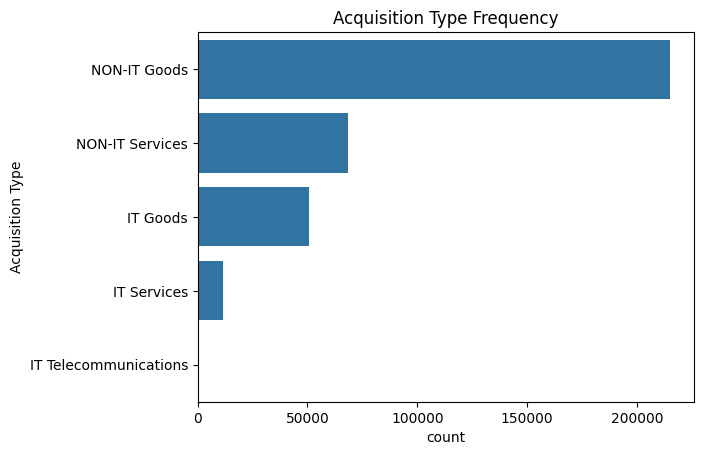

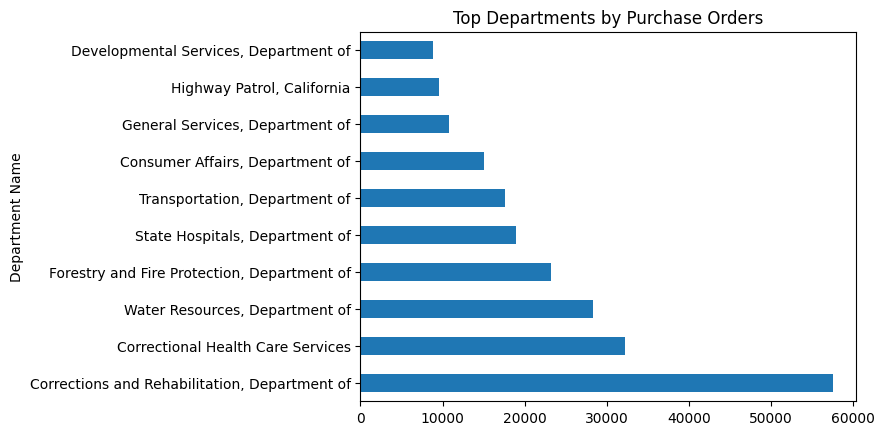

In [23]:
sns.countplot(y='Acquisition Type', data=df, order=df['Acquisition Type'].value_counts().index)
plt.title('Acquisition Type Frequency')
plt.show()

# Top 10 Departments by Purchase Orders
df['Department Name'].value_counts().head(10).plot(kind='barh')
plt.title('Top Departments by Purchase Orders')
plt.show()

# Feature Engineering
In this section, we will create new features from the existing data to enhance the predictive power of our models.
Feature engineering involves transforming raw data into meaningful features that better represent the underlying problem to the predictive models.
This process can significantly improve the performance of machine learning algorithms.

The following cells will demonstrate various feature engineering techniques applied to our dataset.

In [24]:
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Purchase Day'] = df['Purchase Date'].dt.day
df['Purchase Weekday'] = df['Purchase Date'].dt.day_name()
df['Purchase Quarter'] = df['Purchase Date'].dt.quarter

In [25]:
df['Days Between Creation and Purchase'] = (df['Purchase Date'] - df['Creation Date']).dt.days

In [26]:
supplier_spending = df.groupby('Supplier Name')['Total Price'].sum().reset_index().rename(columns={'Total Price': 'Total Spending by Supplier'})
df = df.merge(supplier_spending, on='Supplier Name', how='left')

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\174136058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supplier_spending = df.groupby('Supplier Name')['Total Price'].sum().reset_index().rename(columns={'Total Price': 'Total Spending by Supplier'})


In [27]:
avg_item_cost = df.groupby('Item Name')['Unit Price'].mean().reset_index().rename(columns={'Unit Price': 'Average Unit Price'})
df = df.merge(avg_item_cost, on='Item Name', how='left')

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2756775880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_item_cost = df.groupby('Item Name')['Unit Price'].mean().reset_index().rename(columns={'Unit Price': 'Average Unit Price'})


In [28]:
# Step 1: Use value_counts to get total order count by department as a DataFrame
orders_by_department = df['Department Name'].value_counts().reset_index()

# Step 2: Rename columns for clarity
orders_by_department.columns = ['Department Name', 'Total Orders by Department']

# Step 3: Merge the original DataFrame with the newly created DataFrame that contains total orders per department
df = df.merge(orders_by_department, on='Department Name', how='left')

In [29]:
df['Cost per Quantity'] = df['Total Price'] / df['Quantity']

In [30]:
df['High Value Order'] = df['Total Price'] > 10000

In [31]:
item_counts = df['Item Name'].value_counts()
frequent_items_threshold = item_counts.median()  # Example threshold
df['Frequent Item'] = df['Item Name'].apply(lambda x: item_counts[x] > frequent_items_threshold)

In [32]:
df['Cumulative Spending'] = df.groupby('Department Name')['Total Price'].cumsum()

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\4004456477.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Cumulative Spending'] = df.groupby('Department Name')['Total Price'].cumsum()


In [33]:
df['Acquisition Type_Department'] = df['Acquisition Type'].astype(str) + '_' + df['Department Name'].astype(str)

In [34]:
avg_days_supplier = df.groupby('Supplier Name')['Days Between Creation and Purchase'].mean().reset_index().rename(columns={'Days Between Creation and Purchase': 'Avg Days Between Creation and Purchase'})
df = df.merge(avg_days_supplier, on='Supplier Name', how='left')

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\1764961552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_days_supplier = df.groupby('Supplier Name')['Days Between Creation and Purchase'].mean().reset_index().rename(columns={'Days Between Creation and Purchase': 'Avg Days Between Creation and Purchase'})


In [35]:
df['Cumulative Spending by Department'] = df.groupby('Department Name')['Total Price'].cumsum()

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2749566642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Cumulative Spending by Department'] = df.groupby('Department Name')['Total Price'].cumsum()


In [36]:
df['Is Weekend Purchase'] = df['Purchase Weekday'].isin(['Saturday', 'Sunday']).astype(int)

In [37]:
avg_spending_by_quarter = df.groupby(['Department Name', 'Purchase Quarter'])['Total Price'].mean().reset_index().rename(columns={'Total Price': 'Avg Spending per Quarter by Department'})
df = df.merge(avg_spending_by_quarter, on=['Department Name', 'Purchase Quarter'], how='left')

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\3021689511.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_quarter = df.groupby(['Department Name', 'Purchase Quarter'])['Total Price'].mean().reset_index().rename(columns={'Total Price': 'Avg Spending per Quarter by Department'})


In [38]:
top_spending_department_threshold = df.groupby('Department Name')['Total Spending by Supplier'].transform('median')
df['Top Spending Department'] = df['Total Spending by Supplier'] > top_spending_department_threshold

C:\Users\Arshad.irfan\AppData\Local\Temp\ipykernel_13484\2169658954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_spending_department_threshold = df.groupby('Department Name')['Total Spending by Supplier'].transform('median')


In [39]:
scaler = StandardScaler()
# df_encoded[['Quantity', 'Unit Price', 'Total Price']] = scaler.fit_transform(df_encoded[['Quantity', 'Unit Price', 'Total Price']])

In [40]:
df['Item Description'] = df['Item Description'].str.lower()

In [41]:
df['Item Description'] = df['Item Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [42]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Item Description'] = df['Item Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arshad.irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
tfidf = TfidfVectorizer(max_features=500)  # Limit features to avoid large dimensionality
item_desc_matrix = tfidf.fit_transform(df['Item Description'])

In [44]:
df_encoded = pd.get_dummies(df, columns=['Acquisition Type', 'Sub-Acquisition Type', 'Acquisition Method', 
                                         'Sub-Acquisition Method', 'Department Name', 'CalCard'])

# Model training

This section is dedicated to training the machine learning model.
The model will be used to predict various intents based on user queries.
We will use a logistic regression model for this purpose.

# Step 1: Prepare the data
The data has already been preprocessed and encoded in previous cells.
We will use the encoded dataframe 'df_encoded' for training the model.

# Step 2: Define the features and target variable
The features will be the encoded columns and the target variable will be the 'intent' column.
Ensure that the 'intent' column is present in the dataframe.

# Step 3: Split the data into training and testing sets
We will use an 80-20 split for training and testing.

# Step 4: Train the logistic regression model
We will use the LogisticRegression class from sklearn to train the model.

# Step 5: Evaluate the model
After training, we will evaluate the model's performance on the test set.

Note: The actual code for these steps will be written in the following cells.

In [45]:
from pymongo import MongoClient
import json

data_json = df.to_json(orient='records')

data = json.loads(data_json)

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["procurement_db"]
collection = db["purchase_orders"]  

# Insert the data into MongoDB
collection.insert_many(data)

# Verification Step: Ensure data has been inserted
print(f"Number of records in MongoDB: {collection.count_documents({})}")

Number of records in MongoDB: 692036


In [46]:
training_data = [
    # Total Spending Intent
    {"query": "How much was spent by Consumer Affairs?", "intent": "total_spending"},
    {"query": "What is the total spending for 2013?", "intent": "total_spending"},
    {"query": "Show me the spending details for 2014.", "intent": "total_spending"},
    {"query": "How much did we spend in the fiscal year 2015?", "intent": "total_spending"},
    {"query": "What was the expenditure by Correctional Health Care Services?", "intent": "total_spending"},
    {"query": "Total spending for IT services in 2013?", "intent": "total_spending"},
    {"query": "Can you tell me the total cost incurred by Water Resources?", "intent": "total_spending"},
    {"query": "How much was spent by Consumer Affairs?", "intent": "total_spending"},
    {"query": "What is the total spending for 2015?", "intent": "total_spending"},
    {"query": "Show me the spending details for 2014.", "intent": "total_spending"},
    {"query": "How much did we spend in the fiscal year 2015?", "intent": "total_spending"},
    {"query": "What was the expenditure by Correctional Health Care Services?", "intent": "total_spending"},
    {"query": "Total spending for IT services in 2013?", "intent": "total_spending"},
    {"query": "Can you tell me the total cost incurred by Water Resources?", "intent": "total_spending"},
    {"query": "How much money was spent overall in the last quarter?", "intent": "total_spending"},
    {"query": "What was the overall expenditure for the entire year?", "intent": "total_spending"},
    {"query": "How much was spent across all departments?", "intent": "total_spending"},
    {"query": "How much did we spend this year?", "intent": "total_spending"},
    {"query": "Provide me with the total spending in 2012.", "intent": "total_spending"},
    {"query": "How much expenditure did Consumer Affairs have in 2013?", "intent": "total_spending"},
    {"query": "What is the cumulative spending for IT goods?", "intent": "total_spending"},
    {"query": "Give me the total spending for Correctional Health Services.", "intent": "total_spending"},
    {"query": "What is the total cost for all purchases made by Consumer Affairs?", "intent": "total_spending"},
    {"query": "Can you tell me how much was spent by Water Resources for IT services?", "intent": "total_spending"},
    {"query": "Total expenditure for fiscal year 2014-2015?", "intent": "total_spending"},
    {"query": "Show me the spending summary for Correctional Health Care.", "intent": "total_spending"},
    {"query": "Total amount of money spent on procurement in Q2?", "intent": "total_spending"},
    {"query": "How much was spent by each department?", "intent": "total_spending"},
    {"query": "Total procurement spending by Correctional Health Services?", "intent": "total_spending"},
    {"query": "How much was spent on non-IT services in 2015?", "intent": "total_spending"},
    {"query": "Can you provide the total expenses for Consumer Affairs for IT equipment?", "intent": "total_spending"},
    {"query": "Total money spent by Consumer Affairs for 2013?", "intent": "total_spending"},
    {"query": "How much did we spend in fiscal year 2013-2014?", "intent": "total_spending"},
    {"query": "Total spending for purchases made through Statewide Contracts?", "intent": "total_spending"},
    {"query": "Total procurement costs in Q3?", "intent": "total_spending"},
    {"query": "Show me the total expenditure for IT-related purchases.", "intent": "total_spending"},
    {"query": "What is the sum total of all spending across departments?", "intent": "total_spending"},
    {"query": "Total amount spent during fiscal year 2012?", "intent": "total_spending"},
    {"query": "How much was the total spending on goods and services?", "intent": "total_spending"},
    {"query": "Give me a summary of expenditures by Water Resources.", "intent": "total_spending"},
    {"query": "Show me the overall spending for 2015.", "intent": "total_spending"},
    {"query": "What was the total procurement expense in 2014?", "intent": "total_spending"},
    {"query": "How much money did we spend on Consumer Affairs' purchases?", "intent": "total_spending"},
    {"query": "Total expenditure for Correctional Health Care Services this quarter?", "intent": "total_spending"},
    {"query": "How much has been spent overall by Correctional Health Services?", "intent": "total_spending"},
    {"query": "Provide the overall cost of purchases for 2013.", "intent": "total_spending"},
    {"query": "Total procurement cost for IT-related services in 2014?", "intent": "total_spending"},
    {"query": "What is the amount spent by Consumer Affairs on goods?", "intent": "total_spending"},
    {"query": "Total fiscal spending by Consumer Affairs Department?", "intent": "total_spending"},
    {"query": "Show me the expenditure details for Consumer Affairs.", "intent": "total_spending"},
    {"query": "What is the total expenditure for IT services?", "intent": "total_spending"},
    {"query": "Give me the amount spent on all procurement orders.", "intent": "total_spending"},
    {"query": "What was the spending done by the Consumer Affairs Department?", "intent": "total_spending"},
    {"query": "How much did we spend on all IT-related goods?", "intent": "total_spending"},
    {"query": "What is the total expense for IT and non-IT services?", "intent": "total_spending"},
    {"query": "How much has been spent on procurement for 2014?", "intent": "total_spending"},
    {"query": "Total spend Consumer Affairs 2013?", "intent": "total_spending"},
    {"query": "Amt spent by Correctional Health Q2?", "intent": "total_spending"},
    {"query": "How much did we spend on all non-IT services last year?", "intent": "total_spending"},
    {"query": "Show spending summary Consumer Affairs?", "intent": "total_spending"},
    {"query": "Expenditure Q3, Consumer Affairs?", "intent": "total_spending"},
    {"query": "Total spend across departments?", "intent": "total_spending"},
    {"query": "Consumer Affairs full year spend?", "intent": "total_spending"},
    {"query": "What’s the spending breakdown for Water Resources?", "intent": "total_spending"},
    {"query": "Can I get the spending total on all IT services?", "intent": "total_spending"},
    {"query": "Sum total of Correctional Health's spending 2015?", "intent": "total_spending"},
    {"query": "What was the overall expenditure this quarter?", "intent": "total_spending"},
    {"query": "What are the total costs by quarter for this fiscal?", "intent": "total_spending"},
    {"query": "How much was budget spent in fiscal year 2012?", "intent": "total_spending"},
    {"query": "Show Consumer Affairs total for all purchases?", "intent": "total_spending"},
    {"query": "Spending totals all departments?", "intent": "total_spending"},
    {"query": "How much did Consumer Affairs spend in 2014?", "intent": "total_spending"},
    {"query": "Total spending for Water Resources Department in Q3?", "intent": "total_spending"},
    {"query": "What was the annual expenditure by Consumer Affairs in 2015?", "intent": "total_spending"},
    {"query": "Can you tell me the spending amount for Correctional Health Care Services this year?", "intent": "total_spending"},
    {"query": "What was the department-wise spending in Q1?", "intent": "total_spending"},
    {"query": "Total expenditure for the Water Resources department in Q4 of last fiscal year?", "intent": "total_spending"},
    {"query": "What is the total spending for the Department of Consumer Affairs in 2020?", "intent": "total_spending"},
    {"query": "Show me spending breakdown for Consumer Affairs in quarter three.", "intent": "total_spending"},



    # Highest Spending Quarter Intent
    {"query": "Which quarter had the most spending?", "intent": "highest_spending_quarter"},
    {"query": "In which quarter did we spend the most money?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the highest expenditure?", "intent": "highest_spending_quarter"},
    {"query": "What was the quarter with the highest spending?", "intent": "highest_spending_quarter"},
    {"query": "Can you tell me the quarter with the most purchases?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the most spending?", "intent": "highest_spending_quarter"},
    {"query": "In which quarter did we spend the most money?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the highest expenditure?", "intent": "highest_spending_quarter"},
    {"query": "What was the quarter with the highest spending?", "intent": "highest_spending_quarter"},
    {"query": "Can you tell me the quarter with the most purchases?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter showed the highest spending?", "intent": "highest_spending_quarter"},
    {"query": "Tell me which quarter had the largest expenditure.", "intent": "highest_spending_quarter"},
    {"query": "In which quarter did spending peak?", "intent": "highest_spending_quarter"},
    {"query": "Which fiscal quarter had the highest spending?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter experienced the highest amount of spending?", "intent": "highest_spending_quarter"},
    {"query": "What was the peak spending quarter?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the maximum spending?", "intent": "highest_spending_quarter"},
    {"query": "What quarter saw the highest procurement expenses?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the highest overall costs?", "intent": "highest_spending_quarter"},
    {"query": "Show me the quarter that had the largest budget expenditure.", "intent": "highest_spending_quarter"},
    {"query": "In which quarter did we spend the most on goods?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter saw the biggest purchases?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the highest total procurement spending?", "intent": "highest_spending_quarter"},
    {"query": "Which three months had the most spending?", "intent": "highest_spending_quarter"},
    {"query": "During which quarter was the spending the greatest?", "intent": "highest_spending_quarter"},
    {"query": "What quarter had the maximum procurement?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter saw the highest level of expenses?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter recorded the highest expenditure?", "intent": "highest_spending_quarter"},
    {"query": "Which fiscal quarter had the largest purchases?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter witnessed the maximum spending?", "intent": "highest_spending_quarter"},
    {"query": "In which quarter was the expenditure at its highest?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the most procurement activities?", "intent": "highest_spending_quarter"},
    {"query": "What was the fiscal quarter with the highest cost?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the largest purchasing budget?", "intent": "highest_spending_quarter"},
    {"query": "What quarter had the highest purchases?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the biggest expense incurred?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter experienced the highest expenditure levels?", "intent": "highest_spending_quarter"},
    {"query": "What quarter reported the largest procurement spending?", "intent": "highest_spending_quarter"},
    {"query": "Tell me which quarter had the largest purchases by value.", "intent": "highest_spending_quarter"},
    {"query": "During which quarter did procurement spending peak?", "intent": "highest_spending_quarter"},
    {"query": "Which fiscal quarter showed maximum procurement?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter saw the largest overall spending?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the greatest financial outlay?", "intent": "highest_spending_quarter"},
    {"query": "In which quarter was the spending the highest?", "intent": "highest_spending_quarter"},
    {"query": "Can you tell me which quarter recorded the highest expenditure?", "intent": "highest_spending_quarter"},
    {"query": "What was the quarter with the largest procurement costs?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter spent the most on procurement activities?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter experienced the most procurement expenditures?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter saw the highest overall procurement spend?", "intent": "highest_spending_quarter"},
    {"query": "In which quarter did procurement costs peak?", "intent": "highest_spending_quarter"},
    {"query": "Tell me which quarter had the largest spending for procurement.", "intent": "highest_spending_quarter"},
    {"query": "Which quarter marked the highest level of expenditure?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the greatest procurement spending?", "intent": "highest_spending_quarter"},
    {"query": "During which fiscal quarter was the spending highest?", "intent": "highest_spending_quarter"},
    {"query": "Peak spending quarter?", "intent": "highest_spending_quarter"},
    {"query": "Biggest spend period?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter saw max spend?", "intent": "highest_spending_quarter"},
    {"query": "Show quarter with peak expenditure", "intent": "highest_spending_quarter"},
    {"query": "Quarter with most orders?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter was our budget mostly spent?", "intent": "highest_spending_quarter"},
    {"query": "Max spend quarter in recent years?", "intent": "highest_spending_quarter"},
    {"query": "Quarter where highest total spend happened?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter's expenditure topped the charts?", "intent": "highest_spending_quarter"},
    {"query": "Quarter with largest costs incurred?", "intent": "highest_spending_quarter"},
    {"query": "Show the quarter with top spending", "intent": "highest_spending_quarter"},
    {"query": "Where did we spend the most in Qs?", "intent": "highest_spending_quarter"},
    {"query": "What quarter had record spend levels?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter had the most expenses incurred?", "intent": "highest_spending_quarter"},
    {"query": "In what quarter did the most spending occur?", "intent": "highest_spending_quarter"},
    {"query": "Which quarter topped spending for the year?", "intent": "highest_spending_quarter"},
    {"query": "Show me the quarter with maximum spending activity.", "intent": "highest_spending_quarter"},
    {"query": "During which fiscal quarter did expenses peak?", "intent": "highest_spending_quarter"},
    {"query": "What quarter saw the highest overall spending?", "intent": "highest_spending_quarter"},
    {"query": "Which three-month period had the highest spend?", "intent": "highest_spending_quarter"},



    # Frequent Items Intent
    {"query": "What items were ordered frequently?", "intent": "frequent_items"},
    {"query": "Which items are the most commonly purchased?", "intent": "frequent_items"},
    {"query": "Show me the frequently ordered line items.", "intent": "frequent_items"},
    {"query": "What products were ordered often?", "intent": "frequent_items"},
    {"query": "What items were bought the most frequently?", "intent": "frequent_items"},
    {"query": "What items were ordered frequently?", "intent": "frequent_items"},
    {"query": "Which items are the most commonly purchased?", "intent": "frequent_items"},
    {"query": "Show me the frequently ordered line items.", "intent": "frequent_items"},
    {"query": "What products were ordered often?", "intent": "frequent_items"},
    {"query": "What items were bought the most frequently?", "intent": "frequent_items"},
    {"query": "What are the most frequently ordered goods?", "intent": "frequent_items"},
    {"query": "Which products were purchased the most often?", "intent": "frequent_items"},
    {"query": "Tell me the items that were ordered the most.", "intent": "frequent_items"},
    {"query": "Which items appear frequently in purchase orders?", "intent": "frequent_items"},
    {"query": "What goods are commonly procured?", "intent": "frequent_items"},
    {"query": "Which products were frequently requested?", "intent": "frequent_items"},
    {"query": "What are the top frequently bought items?", "intent": "frequent_items"},
    {"query": "Show me the items with the highest order frequency.", "intent": "frequent_items"},
    {"query": "Which items are most often seen in purchase orders?", "intent": "frequent_items"},
    {"query": "Which products were ordered in the highest quantities?", "intent": "frequent_items"},
    {"query": "Tell me the line items that were frequently procured.", "intent": "frequent_items"},
    {"query": "What are the items that we purchase frequently?", "intent": "frequent_items"},
    {"query": "Which goods are repeatedly ordered?", "intent": "frequent_items"},
    {"query": "What were the frequently acquired products?", "intent": "frequent_items"},
    {"query": "What items did we order multiple times?", "intent": "frequent_items"},
    {"query": "What are the top items by frequency of order?", "intent": "frequent_items"},
    {"query": "Which line items were purchased repeatedly?", "intent": "frequent_items"},
    {"query": "Tell me which products are most frequently bought.", "intent": "frequent_items"},
    {"query": "What items were purchased in bulk repeatedly?", "intent": "frequent_items"},
    {"query": "Which items are listed most often in purchase orders?", "intent": "frequent_items"},
    {"query": "What products were ordered the most over the last year?", "intent": "frequent_items"},
    {"query": "Show me the most commonly procured items.", "intent": "frequent_items"},
    {"query": "Which items do we frequently place orders for?", "intent": "frequent_items"},
    {"query": "What are the most common items in our procurement?", "intent": "frequent_items"},
    {"query": "Which goods have been ordered multiple times?", "intent": "frequent_items"},
    {"query": "Tell me about the items that were frequently purchased.", "intent": "frequent_items"},
    {"query": "What items did we purchase most often?", "intent": "frequent_items"},
    {"query": "Which products have been frequently procured?", "intent": "frequent_items"},
    {"query": "List the items that were ordered frequently.", "intent": "frequent_items"},
    {"query": "What are the most ordered items?", "intent": "frequent_items"},
    {"query": "Which goods were bought repeatedly?", "intent": "frequent_items"},
    {"query": "Can you show me the products that have been bought frequently?", "intent": "frequent_items"},
    {"query": "Which line items show high order frequency?", "intent": "frequent_items"},
    {"query": "What items do we consistently buy?", "intent": "frequent_items"},
    {"query": "What are the items that appear the most in orders?", "intent": "frequent_items"},
    {"query": "Which goods do we order the most?", "intent": "frequent_items"},
    {"query": "What are the items with the highest procurement frequency?", "intent": "frequent_items"},
    {"query": "Which products were acquired on a frequent basis?", "intent": "frequent_items"},
    {"query": "Tell me which items we commonly buy.", "intent": "frequent_items"},
    {"query": "What are the items that were ordered several times?", "intent": "frequent_items"},
    {"query": "Which products are ordered the most frequently?", "intent": "frequent_items"},
    {"query": "List the goods that are frequently purchased.", "intent": "frequent_items"},
    {"query": "What were the most commonly ordered line items?", "intent": "frequent_items"},
    {"query": "Which items are always in demand for orders?", "intent": "frequent_items"},
    {"query": "Show me the items that we order on a regular basis.", "intent": "frequent_items"},
    {"query": "Top items purchased?", "intent": "frequent_items"},
    {"query": "What items were bought the most?", "intent": "frequent_items"},
    {"query": "Show most frequently bought products", "intent": "frequent_items"},
    {"query": "Frequently acquired items list?", "intent": "frequent_items"},
    {"query": "What are the most repeated purchases?", "intent": "frequent_items"},
    {"query": "List most common line items?", "intent": "frequent_items"},
    {"query": "What products appear often in orders?", "intent": "frequent_items"},
    {"query": "Top ordered supplies?", "intent": "frequent_items"},
    {"query": "Can you show popular items ordered?", "intent": "frequent_items"},
    {"query": "Most requested procurement items?", "intent": "frequent_items"},
    {"query": "What were frequent purchases last year?", "intent": "frequent_items"},
    {"query": "List top bought goods?", "intent": "frequent_items"},
    {"query": "Commonly ordered goods?", "intent": "frequent_items"},
    {"query": "Which items are regular orders?", "intent": "frequent_items"},
    {"query": "Most ordered items in recent years?", "intent": "frequent_items"},


    # Orders Count Intent
    {"query": "How many orders were created in Q1?", "intent": "orders_count"},
    {"query": "Number of orders placed in the first quarter?", "intent": "orders_count"},
    {"query": "How many purchase orders were created in March?", "intent": "orders_count"},
    {"query": "Can you tell me how many orders were made in Q3?", "intent": "orders_count"},
    {"query": "Show me the count of orders in quarter four.", "intent": "orders_count"},
    {"query": "How many orders were created in Q1?", "intent": "orders_count"},
    {"query": "Number of orders placed in the first quarter?", "intent": "orders_count"},
    {"query": "How many purchase orders were created in March?", "intent": "orders_count"},
    {"query": "Can you tell me how many orders were made in Q3?", "intent": "orders_count"},
    {"query": "Show me the count of orders in quarter four.", "intent": "orders_count"},
    {"query": "How many orders did we create this year?", "intent": "orders_count"},
    {"query": "What is the total number of orders for Q2?", "intent": "orders_count"},
    {"query": "How many orders were generated in the second quarter?", "intent": "orders_count"},
    {"query": "Tell me how many orders were placed in April.", "intent": "orders_count"},
    {"query": "How many purchase orders were processed in the last quarter?", "intent": "orders_count"},
    {"query": "What's the count of all orders made in February?", "intent": "orders_count"},
    {"query": "Give me the number of orders placed in the third quarter.", "intent": "orders_count"},
    {"query": "How many orders were made in Q4?", "intent": "orders_count"},
    {"query": "Can you provide the number of orders for Q1?", "intent": "orders_count"},
    {"query": "How many orders were placed during January?", "intent": "orders_count"},
    {"query": "Show me the count of purchase orders from July.", "intent": "orders_count"},
    {"query": "How many orders were completed in the fiscal year?", "intent": "orders_count"},
    {"query": "What's the order count for June?", "intent": "orders_count"},
    {"query": "Give me the number of procurement orders in the first month.", "intent": "orders_count"},
    {"query": "What is the number of orders made in Q2?", "intent": "orders_count"},
    {"query": "How many orders did we create in the last month of Q4?", "intent": "orders_count"},
    {"query": "Can you tell me the number of purchase orders processed in May?", "intent": "orders_count"},
    {"query": "Show me how many orders were placed in each quarter.", "intent": "orders_count"},
    {"query": "What was the count of orders in the month of December?", "intent": "orders_count"},
    {"query": "What's the total number of orders placed in August?", "intent": "orders_count"},
    {"query": "Give me the count of purchase orders during Q3.", "intent": "orders_count"},
    {"query": "How many orders did we place in the third quarter of the year?", "intent": "orders_count"},
    {"query": "Tell me the count of orders in the second month of Q2.", "intent": "orders_count"},
    {"query": "How many orders were placed overall during Q4?", "intent": "orders_count"},
    {"query": "What's the number of orders for October?", "intent": "orders_count"},
    {"query": "How many purchase orders were created in September?", "intent": "orders_count"},
    {"query": "How many orders did we generate in Q2?", "intent": "orders_count"},
    {"query": "What's the total order count for the second quarter?", "intent": "orders_count"},
    {"query": "Provide me with the number of orders in Q1.", "intent": "orders_count"},
    {"query": "How many procurement orders were completed in November?", "intent": "orders_count"},
    {"query": "How many purchase orders were made in Q3?", "intent": "orders_count"},
    {"query": "Tell me the number of orders from the first quarter of the year.", "intent": "orders_count"},
    {"query": "Show me the number of orders placed in March.", "intent": "orders_count"},
    {"query": "How many orders were generated throughout the entire year?", "intent": "orders_count"},
    {"query": "What was the total number of orders created in fiscal Q1?", "intent": "orders_count"},
    {"query": "Can you provide me with the total count of orders for Q4?", "intent": "orders_count"},
    {"query": "How many orders were made in July?", "intent": "orders_count"},
    {"query": "Tell me how many purchase orders we processed last quarter.", "intent": "orders_count"},
    {"query": "What was the order count in the final quarter?", "intent": "orders_count"},
    {"query": "Show me the orders placed during the first month of Q2.", "intent": "orders_count"},
    {"query": "How many orders did we create in the beginning of the fiscal year?", "intent": "orders_count"},
    {"query": "How many purchase orders were created in the last fiscal quarter?", "intent": "orders_count"},
    {"query": "Tell me the count of orders for fiscal Q2.", "intent": "orders_count"},
    {"query": "How many orders were placed in the fiscal fourth quarter?", "intent": "orders_count"},
    {"query": "Total order count?", "intent": "orders_count"},
    {"query": "How many orders in Q4?", "intent": "orders_count"},
    {"query": "Show order count by month", "intent": "orders_count"},
    {"query": "Total procurement orders fiscal year?", "intent": "orders_count"},
    {"query": "Total orders Q1?", "intent": "orders_count"},
    {"query": "Number of orders placed first half?", "intent": "orders_count"},
    {"query": "Count of orders last quarter?", "intent": "orders_count"},
    {"query": "Monthly orders breakdown?", "intent": "orders_count"},
    {"query": "Show orders for the full year", "intent": "orders_count"},
    {"query": "Number of orders in 2014?", "intent": "orders_count"},
    {"query": "Orders count this year?", "intent": "orders_count"},
    {"query": "Show orders total for Q3?", "intent": "orders_count"},
    {"query": "Total orders made in fiscal Q2?", "intent": "orders_count"},
    {"query": "Order totals by department?", "intent": "orders_count"},
    {"query": "How many orders so far this year?", "intent": "orders_count"},
    {"query": "How many orders were completed in the third quarter of 2019?", "intent": "orders_count"},
    {"query": "What's the count of orders placed in Q2 of 2018?", "intent": "orders_count"},
    {"query": "Total number of orders for the Department of Health in Q1?", "intent": "orders_count"},
    {"query": "How many orders did we place in quarter four last year?", "intent": "orders_count"},
    {"query": "Number of orders created in each month of Q1 this year?", "intent": "orders_count"},
    {"query": "Show the order count for Consumer Affairs in fiscal Q3.", "intent": "orders_count"},
    {"query": "What's the total number of purchase orders for Q4?", "intent": "orders_count"},



    # Supplier Information Intent
    {"query": "Who was the supplier for IT goods?", "intent": "supplier_information"},
    {"query": "Can you tell me the supplier for non-IT services?", "intent": "supplier_information"},
    {"query": "Which supplier provided the lab equipment?", "intent": "supplier_information"},
    {"query": "Who supplied the toner cartridges?", "intent": "supplier_information"},
    {"query": "Show me the supplier for Consumer Affairs.", "intent": "supplier_information"},
    {"query": "Who was the supplier for IT goods?", "intent": "supplier_information"},
    {"query": "Can you tell me the supplier for non-IT services?", "intent": "supplier_information"},
    {"query": "Which supplier provided the lab equipment?", "intent": "supplier_information"},
    {"query": "Who supplied the toner cartridges?", "intent": "supplier_information"},
    {"query": "Show me the supplier for Consumer Affairs.", "intent": "supplier_information"},
    {"query": "Who is the vendor for Correctional Health Care Services?", "intent": "supplier_information"},
    {"query": "Which company supplied IT services in 2013?", "intent": "supplier_information"},
    {"query": "Tell me who provided the non-IT goods.", "intent": "supplier_information"},
    {"query": "Which supplier delivered the lab supplies?", "intent": "supplier_information"},
    {"query": "Who was the vendor for technology equipment?", "intent": "supplier_information"},
    {"query": "Can you provide details about the supplier for printer cartridges?", "intent": "supplier_information"},
    {"query": "Who supplied correctional facility goods?", "intent": "supplier_information"},
    {"query": "Give me the name of the supplier for IT solutions.", "intent": "supplier_information"},
    {"query": "Who provided services to Consumer Affairs Department?", "intent": "supplier_information"},
    {"query": "Which vendor delivered the items to Water Resources?", "intent": "supplier_information"},
    {"query": "Who is the supplier for the tires that were purchased?", "intent": "supplier_information"},
    {"query": "Show me which supplier provided consumer electronics.", "intent": "supplier_information"},
    {"query": "Who was the vendor responsible for supplying the medical supplies?", "intent": "supplier_information"},
    {"query": "What is the name of the supplier for stationery items?", "intent": "supplier_information"},
    {"query": "Who provided the toner cartridges for the department?", "intent": "supplier_information"},
    {"query": "Can you show me which company supplied office supplies?", "intent": "supplier_information"},
    {"query": "Which supplier delivered goods to Correctional Health Care?", "intent": "supplier_information"},
    {"query": "Who was the supplier for IT-related purchases in Q3?", "intent": "supplier_information"},
    {"query": "Which supplier provided the goods to the State Hospitals?", "intent": "supplier_information"},
    {"query": "Who was responsible for providing the laboratory products?", "intent": "supplier_information"},
    {"query": "Which supplier sold the lab equipment to the department?", "intent": "supplier_information"},
    {"query": "Can you tell me who supplied the healthcare products?", "intent": "supplier_information"},
    {"query": "What company provided the toner cartridges to Corrections and Rehabilitation?", "intent": "supplier_information"},
    {"query": "Who is the supplier for the goods purchased in October?", "intent": "supplier_information"},
    {"query": "Give me the supplier for the IT hardware that was ordered.", "intent": "supplier_information"},
    {"query": "Which supplier provided IT services in 2015?", "intent": "supplier_information"},
    {"query": "Who supplied the USB drives to Consumer Affairs?", "intent": "supplier_information"},
    {"query": "Show me the vendor who delivered the software products.", "intent": "supplier_information"},
    {"query": "Who was the supplier for goods purchased under the WSCA/Coop?", "intent": "supplier_information"},
    {"query": "Which company supplied consumer goods to Consumer Affairs?", "intent": "supplier_information"},
    {"query": "Who was responsible for supplying the toner to Correctional Health?", "intent": "supplier_information"},
    {"query": "Who provided IT services for Q2 in 2014?", "intent": "supplier_information"},
    {"query": "Who was the supplier for lab equipment in 2013?", "intent": "supplier_information"},
    {"query": "Tell me which supplier provided consumer products in Q4.", "intent": "supplier_information"},
    {"query": "Which supplier sold office supplies to Consumer Affairs?", "intent": "supplier_information"},
    {"query": "Who supplied the goods purchased in March?", "intent": "supplier_information"},
    {"query": "Show me the supplier for the purchases made in Q1.", "intent": "supplier_information"},
    {"query": "Who provided toner cartridges in the second quarter?", "intent": "supplier_information"},
    {"query": "Can you tell me the supplier for acquisition number REQ0011118?", "intent": "supplier_information"},
    {"query": "Who delivered consumer electronics in 2015?", "intent": "supplier_information"},
    {"query": "Which supplier provided medical supplies for Correctional Health Care?", "intent": "supplier_information"},
    {"query": "Who is the supplier for toner purchases under Consumer Affairs?", "intent": "supplier_information"},
    {"query": "Show me the vendor that supplied goods for department purchases in July.", "intent": "supplier_information"},
    {"query": "Which company was responsible for providing software solutions in 2014?", "intent": "supplier_information"},
    {"query": "Vendor for IT purchases?", "intent": "supplier_information"},
    {"query": "Supplier of non-IT goods?", "intent": "supplier_information"},
    {"query": "Show vendor list for Consumer Affairs", "intent": "supplier_information"},
    {"query": "Vendor for lab supplies?", "intent": "supplier_information"},
    {"query": "Which supplier did we buy toner from?", "intent": "supplier_information"},
    {"query": "Vendor for Consumer Affairs?", "intent": "supplier_information"},
    {"query": "Supplier for office equipment?", "intent": "supplier_information"},
    {"query": "Who’s the vendor for Correctional Health?", "intent": "supplier_information"},
    {"query": "Which supplier gave us medical supplies?", "intent": "supplier_information"},
    {"query": "IT services supplier name?", "intent": "supplier_information"},
    {"query": "Who sold us printer cartridges?", "intent": "supplier_information"},
    {"query": "Vendor for non-IT services?", "intent": "supplier_information"},
    {"query": "Supplier of lab equipment?", "intent": "supplier_information"},
    {"query": "Who was the IT supplier in Q2?", "intent": "supplier_information"},
    {"query": "Can you list vendors for the year?", "intent": "supplier_information"},
    {"query": "Who supplied the HP 35A black toner?", "intent": "supplier_information"},
    {"query": "Which vendor provided lab supplies?", "intent": "supplier_information"},
    {"query": "Who was the supplier of office equipment in Q1?", "intent": "supplier_information"},
    {"query": "Supplier details for Consumer Affairs' toner purchases?", "intent": "supplier_information"},
    {"query": "Who was the provider for correctional health equipment?", "intent": "supplier_information"},
    {"query": "Can you tell me the vendor for the IT services procured?", "intent": "supplier_information"},
    {"query": "Show me the supplier information for all Consumer Affairs' purchases in Q2.", "intent": "supplier_information"},



    # Item Price Information Intent
    {"query": "What is the average unit price for toner?", "intent": "item_price_information"},
    {"query": "Tell me the cost of the IT equipment.", "intent": "item_price_information"},
    {"query": "What is the price per unit for USB drives?", "intent": "item_price_information"},
    {"query": "How much does a black toner cartridge cost on average?", "intent": "item_price_information"},
    {"query": "What is the unit price for the ordered items?", "intent": "item_price_information"},
    {"query": "What is the average unit price for toner?", "intent": "item_price_information"},
    {"query": "Tell me the cost of the IT equipment.", "intent": "item_price_information"},
    {"query": "What is the price per unit for USB drives?", "intent": "item_price_information"},
    {"query": "How much does a black toner cartridge cost on average?", "intent": "item_price_information"},
    {"query": "What is the unit price for the ordered items?", "intent": "item_price_information"},
    {"query": "How much did we pay for each printer cartridge?", "intent": "item_price_information"},
    {"query": "What's the price per unit of the lab equipment?", "intent": "item_price_information"},
    {"query": "What is the average cost of the goods purchased in Q1?", "intent": "item_price_information"},
    {"query": "Can you tell me the average price for IT services?", "intent": "item_price_information"},
    {"query": "What is the cost of a single unit of toner?", "intent": "item_price_information"},
    {"query": "Tell me the unit cost of non-IT goods.", "intent": "item_price_information"},
    {"query": "What was the price for each item in the purchase order?", "intent": "item_price_information"},
    {"query": "How much did each USB drive cost?", "intent": "item_price_information"},
    {"query": "What was the average unit price for office supplies?", "intent": "item_price_information"},
    {"query": "Show me the price for each unit of IT services in 2014.", "intent": "item_price_information"},
    {"query": "How much did we spend per unit on IT goods?", "intent": "item_price_information"},
    {"query": "What's the cost for each toner cartridge ordered?", "intent": "item_price_information"},
    {"query": "Tell me the average unit price for items ordered in Q3.", "intent": "item_price_information"},
    {"query": "What's the price per unit for goods purchased by Consumer Affairs?", "intent": "item_price_information"},
    {"query": "How much was the unit price for correctional facility supplies?", "intent": "item_price_information"},
    {"query": "What is the cost per unit of IT hardware?", "intent": "item_price_information"},
    {"query": "How much does each unit of the ordered item cost?", "intent": "item_price_information"},
    {"query": "What was the price per item for lab products?", "intent": "item_price_information"},
    {"query": "How much is the average price for USB sticks?", "intent": "item_price_information"},
    {"query": "Tell me the cost per unit for the toner cartridges in Q4.", "intent": "item_price_information"},
    {"query": "What was the price of the IT supplies purchased?", "intent": "item_price_information"},
    {"query": "What's the average cost for each ordered item?", "intent": "item_price_information"},
    {"query": "How much did we pay per unit for office furniture?", "intent": "item_price_information"},
    {"query": "What is the cost per unit for supplies purchased in February?", "intent": "item_price_information"},
    {"query": "Can you tell me the unit price for the goods from Correctional Health?", "intent": "item_price_information"},
    {"query": "What is the average price for lab equipment ordered in Q1?", "intent": "item_price_information"},
    {"query": "What's the cost of one black toner?", "intent": "item_price_information"},
    {"query": "How much was each piece of IT equipment?", "intent": "item_price_information"},
    {"query": "What was the unit cost for the items ordered last quarter?", "intent": "item_price_information"},
    {"query": "What's the price for a single unit of the goods ordered in 2015?", "intent": "item_price_information"},
    {"query": "Can you provide the unit price for items bought in April?", "intent": "item_price_information"},
    {"query": "How much was the unit cost for printer supplies?", "intent": "item_price_information"},
    {"query": "What was the price per unit for consumer electronics?", "intent": "item_price_information"},
    {"query": "Tell me the cost for each unit of medical supplies.", "intent": "item_price_information"},
    {"query": "What is the price per item for the equipment purchased in Q2?", "intent": "item_price_information"},
    {"query": "How much did each lab item cost?", "intent": "item_price_information"},
    {"query": "What is the average unit price for toner purchased by State Hospitals?", "intent": "item_price_information"},
    {"query": "Can you give me the unit cost for USB sticks ordered in 2013?", "intent": "item_price_information"},
    {"query": "What's the price per unit of the software products?", "intent": "item_price_information"},
    {"query": "How much was the cost of each toner cartridge bought in Q3?", "intent": "item_price_information"},
    {"query": "Tell me the unit price of the goods purchased in June.", "intent": "item_price_information"},
    {"query": "What was the average unit cost of IT services last fiscal year?", "intent": "item_price_information"},
    {"query": "Show me the cost per unit for goods purchased from Ashan Inc.", "intent": "item_price_information"},
    {"query": "How much did each piece of ordered equipment cost?", "intent": "item_price_information"},
    {"query": "What's the average price for the toner ordered in Q1?", "intent": "item_price_information"},
    {"query": "Price per USB stick?", "intent": "item_price_information"},
    {"query": "How much for toner per unit?", "intent": "item_price_information"},
    {"query": "Unit cost for ordered lab supplies?", "intent": "item_price_information"},
    {"query": "Price for printer cartridges?", "intent": "item_price_information"},
    {"query": "Cost per unit for office supplies?", "intent": "item_price_information"},
    {"query": "What’s the price of toner cartridges?", "intent": "item_price_information"},
    {"query": "Unit price on IT equipment?", "intent": "item_price_information"},
    {"query": "Price per item, lab products?", "intent": "item_price_information"},
    {"query": "Average unit price for supplies?", "intent": "item_price_information"},
    {"query": "Cost per unit for software?", "intent": "item_price_information"},
    {"query": "How much for each toner ordered?", "intent": "item_price_information"},
    {"query": "Can I get the per unit cost of goods?", "intent": "item_price_information"},
    {"query": "What was the price per unit?", "intent": "item_price_information"},
    {"query": "Show price on consumer electronics?", "intent": "item_price_information"},
    {"query": "Average cost per item IT?", "intent": "item_price_information"},
    {"query": "What is the cost per unit for HP toner cartridges?", "intent": "item_price_information"},
    {"query": "Tell me the price for each lab supply unit.", "intent": "item_price_information"},
    {"query": "What’s the rate per unit of the toner cartridges?", "intent": "item_price_information"},
    {"query": "Price of one unit of printer toner?", "intent": "item_price_information"},
    {"query": "How much does each cartridge cost?", "intent": "item_price_information"},
    {"query": "What's the expense per unit of Consumer Affairs' toner?", "intent": "item_price_information"},
    {"query": "Unit price of office supplies?", "intent": "item_price_information"},



    # Supplier Spending Intent
    {"query": "How much did we spend on Pitney Bowes?", "intent": "supplier_spending"},
    {"query": "What is the total spending for Rodea Auto Tech?", "intent": "supplier_spending"},
    {"query": "Show me the total cost for orders from Ashan Inc.", "intent": "supplier_spending"},
    {"query": "How much money was paid to Walgreens Specialty Pharmacy?", "intent": "supplier_spending"},
    {"query": "What is the expenditure on Smile Business Products?", "intent": "supplier_spending"},
    {"query": "How much did we spend on Pitney Bowes?", "intent": "supplier_spending"},
    {"query": "What is the total spending for Rodea Auto Tech?", "intent": "supplier_spending"},
    {"query": "Show me the total cost for orders from Ashan Inc.", "intent": "supplier_spending"},
    {"query": "How much money was paid to Walgreens Specialty Pharmacy?", "intent": "supplier_spending"},
    {"query": "What is the expenditure on Smile Business Products?", "intent": "supplier_spending"},
    {"query": "How much have we spent on Future Data Systems?", "intent": "supplier_spending"},
    {"query": "Can you tell me the total spending for Livermore Scientific?", "intent": "supplier_spending"},
    {"query": "How much did we spend with Technology Integration Group?", "intent": "supplier_spending"},
    {"query": "What was the total cost of orders with VWR International?", "intent": "supplier_spending"},
    {"query": "Tell me the expenditure for orders made to David Gallardo.", "intent": "supplier_spending"},
    {"query": "How much have we paid to Dearborn Group Technology?", "intent": "supplier_spending"},
    {"query": "What's the total spending for orders placed with GRANITE DATA SOLUTIONS?", "intent": "supplier_spending"},
    {"query": "What was the spending amount for purchases from Smile Business Products?", "intent": "supplier_spending"},
    {"query": "How much did we spend on lab equipment from CLARKE SALES?", "intent": "supplier_spending"},
    {"query": "What's the total expenditure for purchases made with Ashan Inc.?", "intent": "supplier_spending"},
    {"query": "Give me the total spending on orders from Future Data Systems.", "intent": "supplier_spending"},
    {"query": "How much have we paid out to Walgreens Specialty Pharmacy LLC?", "intent": "supplier_spending"},
    {"query": "What was the total cost for orders placed with Rodea Auto Tech?", "intent": "supplier_spending"},
    {"query": "Can you provide the spending details for Pitney Bowes?", "intent": "supplier_spending"},
    {"query": "How much did we pay Technology Integration Group in 2014?", "intent": "supplier_spending"},
    {"query": "What's the total expenditure for Ashan Inc. in Q2?", "intent": "supplier_spending"},
    {"query": "How much did we spend on VWR International during Q1?", "intent": "supplier_spending"},
    {"query": "Tell me the spending amount for orders made with Livermore Scientific.", "intent": "supplier_spending"},
    {"query": "What's the cost associated with purchases from Dearborn Group Technology?", "intent": "supplier_spending"},
    {"query": "How much money was paid to GRANITE DATA SOLUTIONS in the first quarter?", "intent": "supplier_spending"},
    {"query": "Can you tell me the expenditure for Future Data Systems?", "intent": "supplier_spending"},
    {"query": "How much have we spent on office supplies from Smile Business Products?", "intent": "supplier_spending"},
    {"query": "What is the total spending on correctional facility supplies from Ashan Inc.?", "intent": "supplier_spending"},
    {"query": "Tell me the total expenditure on medical supplies from Walgreens Specialty Pharmacy.", "intent": "supplier_spending"},
    {"query": "How much did we pay to Rodea Auto Tech for non-IT goods?", "intent": "supplier_spending"},
    {"query": "What's the total cost for purchases made to Livermore Scientific?", "intent": "supplier_spending"},
    {"query": "How much did we spend with Technology Integration Group in Q3?", "intent": "supplier_spending"},
    {"query": "Can you provide me with the spending details for Pitney Bowes in 2015?", "intent": "supplier_spending"},
    {"query": "How much was the total expenditure for orders placed with VWR International in July?", "intent": "supplier_spending"},
    {"query": "What's the spending amount for lab equipment from David Gallardo?", "intent": "supplier_spending"},
    {"query": "How much did we spend on Ashan Inc. in the fiscal year?", "intent": "supplier_spending"},
    {"query": "Give me the total cost for orders from GRANITE DATA SOLUTIONS in March.", "intent": "supplier_spending"},
    {"query": "What was the spending with Future Data Systems during Q4?", "intent": "supplier_spending"},
    {"query": "How much did we pay Walgreens Specialty Pharmacy LLC for Q3 orders?", "intent": "supplier_spending"},
    {"query": "What was the expenditure for orders with CLARKE SALES?", "intent": "supplier_spending"},
    {"query": "Tell me how much we paid to Livermore Scientific, Inc.", "intent": "supplier_spending"},
    {"query": "What's the total expenditure for Technology Integration Group?", "intent": "supplier_spending"},
    {"query": "How much did we spend on toner cartridges from Smile Business Products?", "intent": "supplier_spending"},
    {"query": "Can you give me the total spending on office supplies by Pitney Bowes?", "intent": "supplier_spending"},
    {"query": "How much was the total spending on Walgreens Specialty Pharmacy in Q4?", "intent": "supplier_spending"},
    {"query": "How much did we spend on IT goods provided by Rodea Auto Tech?", "intent": "supplier_spending"},
    {"query": "Tell me the spending amount for lab equipment purchased from David Gallardo.", "intent": "supplier_spending"},
    {"query": "What's the total cost for orders made with Future Data Systems?", "intent": "supplier_spending"},
    {"query": "How much have we paid to GRANITE DATA SOLUTIONS for IT goods?", "intent": "supplier_spending"},
    {"query": "Amount spent on Rodea Auto?", "intent": "supplier_spending"},
    {"query": "Show total spending with Walgreens?", "intent": "supplier_spending"},
    {"query": "Expenditure by Consumer Affairs vendor?", "intent": "supplier_spending"},
    {"query": "Total spent with Tech Integration Group?", "intent": "supplier_spending"},
    {"query": "Amount paid to Smile Business Products?", "intent": "supplier_spending"},
    {"query": "Money spent on Granite Data Solutions?", "intent": "supplier_spending"},
    {"query": "Vendor cost for lab equipment supplier?", "intent": "supplier_spending"},
    {"query": "Spending on Pitney Bowes?", "intent": "supplier_spending"},
    {"query": "Total expenditure with Future Data?", "intent": "supplier_spending"},
    {"query": "Give me total spent with Ashan Inc.", "intent": "supplier_spending"},
    {"query": "How much was paid to Livermore Scientific?", "intent": "supplier_spending"},
    {"query": "Show expenditures for Clarke Sales?", "intent": "supplier_spending"},
    {"query": "Spend for Correctional Health suppliers?", "intent": "supplier_spending"},
    {"query": "Money spent with vendor for toner?", "intent": "supplier_spending"},
    {"query": "Supplier costs for Consumer Affairs?", "intent": "supplier_spending"},
    {"query": "How much did we spend with Pitney Bowes in Q3?", "intent": "supplier_spending"},
    {"query": "Total expenditure on Technology Integration Group last year?", "intent": "supplier_spending"},
    {"query": "What's the total spent on Ashan Inc. in the first quarter?", "intent": "supplier_spending"},
    {"query": "How much did we pay Future Data Systems in fiscal year 2015?", "intent": "supplier_spending"},
    {"query": "Supplier expenditure on IT services in Q2?", "intent": "supplier_spending"},
    {"query": "Total cost incurred with Walgreens Specialty Pharmacy in 2018?", "intent": "supplier_spending"},
    {"query": "Amount spent on Smile Business Products during Q4?", "intent": "supplier_spending"},




    # Specific Acquisition Method Intent
    {"query": "What was the expenditure under Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "How much was spent through Statewide Contract?", "intent": "acquisition_method_spending"},
    {"query": "Total spending using Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Can you tell me how much was spent using WSCA/Coop?", "intent": "acquisition_method_spending"},
    {"query": "What is the total expense for purchases under NCB?", "intent": "acquisition_method_spending"},
    {"query": "What was the expenditure under Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "How much was spent through Statewide Contract?", "intent": "acquisition_method_spending"},
    {"query": "Total spending using Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Can you tell me how much was spent using WSCA/Coop?", "intent": "acquisition_method_spending"},
    {"query": "What is the total expense for purchases under NCB?", "intent": "acquisition_method_spending"},
    {"query": "How much money was spent on items acquired through Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Tell me the spending amount for goods bought via Statewide Contract.", "intent": "acquisition_method_spending"},
    {"query": "Show me the expenditure for purchases under the SB/DVBE Option.", "intent": "acquisition_method_spending"},
    {"query": "How much was the cost for items purchased through Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Give me the total expenditure for goods acquired under WSCA/Coop.", "intent": "acquisition_method_spending"},
    {"query": "What was the total spending under Statewide Contract for Q1?", "intent": "acquisition_method_spending"},
    {"query": "Can you provide the total cost incurred through Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "How much did we spend under NCB for fiscal year 2013?", "intent": "acquisition_method_spending"},
    {"query": "Tell me how much was spent using SB/DVBE Option in Q4.", "intent": "acquisition_method_spending"},
    {"query": "What is the spending amount for purchases made under Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Can you show me the expenditure for goods bought through WSCA/Coop?", "intent": "acquisition_method_spending"},
    {"query": "How much was spent using Informal Competitive for Q2?", "intent": "acquisition_method_spending"},
    {"query": "Give me the total spending under Statewide Contract in 2014.", "intent": "acquisition_method_spending"},
    {"query": "How much was spent on orders made under Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "What's the expenditure for goods acquired through NCB in Q3?", "intent": "acquisition_method_spending"},
    {"query": "Tell me the spending amount for purchases using SB/DVBE Option in July.", "intent": "acquisition_method_spending"},
    {"query": "How much was spent using Informal Competitive for medical supplies?", "intent": "acquisition_method_spending"},
    {"query": "What is the total spending under WSCA/Coop for IT goods?", "intent": "acquisition_method_spending"},
    {"query": "Show me the expenditure for items bought using Statewide Contract.", "intent": "acquisition_method_spending"},
    {"query": "How much was spent on purchases under Formal Competitive in March?", "intent": "acquisition_method_spending"},
    {"query": "Tell me the total expenditure under SB/DVBE Option.", "intent": "acquisition_method_spending"},
    {"query": "What was the spending amount for goods acquired through WSCA/Coop in Q4?", "intent": "acquisition_method_spending"},
    {"query": "Can you provide the total spending for items purchased using Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "How much money was spent under Statewide Contract in Q2?", "intent": "acquisition_method_spending"},
    {"query": "What is the expenditure for goods bought via Formal Competitive in October?", "intent": "acquisition_method_spending"},
    {"query": "Give me the spending details for orders made using WSCA/Coop.", "intent": "acquisition_method_spending"},
    {"query": "How much was spent using NCB for correctional facility supplies?", "intent": "acquisition_method_spending"},
    {"query": "Show me the spending amount for goods purchased through Informal Competitive.", "intent": "acquisition_method_spending"},
    {"query": "What's the total spending under Statewide Contract for the fiscal year?", "intent": "acquisition_method_spending"},
    {"query": "Can you tell me how much was spent on goods purchased using Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Tell me the expenditure amount for items bought under SB/DVBE Option in June.", "intent": "acquisition_method_spending"},
    {"query": "What was the cost for goods bought under NCB in Q1?", "intent": "acquisition_method_spending"},
    {"query": "Give me the spending for goods bought using Statewide Contract in 2015.", "intent": "acquisition_method_spending"},
    {"query": "How much did we spend using WSCA/Coop for office supplies?", "intent": "acquisition_method_spending"},
    {"query": "What's the expenditure for goods bought under Informal Competitive in Q3?", "intent": "acquisition_method_spending"},
    {"query": "How much did we pay for purchases made using Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Show me the spending under SB/DVBE Option for IT services.", "intent": "acquisition_method_spending"},
    {"query": "What was the spending amount for goods purchased under Statewide Contract in Q4?", "intent": "acquisition_method_spending"},
    {"query": "Can you tell me the total cost of items bought through NCB?", "intent": "acquisition_method_spending"},
    {"query": "What's the total spending for goods purchased using Formal Competitive in August?", "intent": "acquisition_method_spending"},
    {"query": "Tell me how much was spent using Informal Competitive in 2013.", "intent": "acquisition_method_spending"},
    {"query": "How much did we spend through Statewide Contract on lab supplies?", "intent": "acquisition_method_spending"},
    {"query": "Give me the spending details for orders made using WSCA/Coop in Q1.", "intent": "acquisition_method_spending"},
    {"query": "Money spent via Statewide Contract?", "intent": "acquisition_method_spending"},
    {"query": "Show spend on WSCA/Coop?", "intent": "acquisition_method_spending"},
    {"query": "Amount under Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Spending via Formal Competitive method?", "intent": "acquisition_method_spending"},
    {"query": "Total expenditure under NCB?", "intent": "acquisition_method_spending"},
    {"query": "Spend on SB/DVBE purchases?", "intent": "acquisition_method_spending"},
    {"query": "Total amount WSCA/Coop orders?", "intent": "acquisition_method_spending"},
    {"query": "Spending under Informal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Money spent on NCB?", "intent": "acquisition_method_spending"},
    {"query": "Total spent under SB/DVBE Option?", "intent": "acquisition_method_spending"},
    {"query": "Spending using Statewide Contract method?", "intent": "acquisition_method_spending"},
    {"query": "How much was spent using WSCA/Coop?", "intent": "acquisition_method_spending"},
    {"query": "What is cost incurred through NCB?", "intent": "acquisition_method_spending"},
    {"query": "Total amount using Informal Comp?", "intent": "acquisition_method_spending"},
    {"query": "Money spent using Formal Competitive?", "intent": "acquisition_method_spending"},
    {"query": "Spending amount under Statewide Contract in Q2?", "intent": "acquisition_method_spending"},
    {"query": "Total expenses for orders under Formal Competitive in 2021?", "intent": "acquisition_method_spending"},
    {"query": "How much was spent via WSCA/Coop in fiscal Q3?", "intent": "acquisition_method_spending"},
    {"query": "Total procurement cost using SB/DVBE Option last quarter?", "intent": "acquisition_method_spending"},
    {"query": "What was the spending on Informal Competitive in Q1?", "intent": "acquisition_method_spending"},
    {"query": "Expenditure on goods under NCB during Q4 of 2019?", "intent": "acquisition_method_spending"},
    {"query": "Show me the spending details for items bought using Statewide Contract in July.", "intent": "acquisition_method_spending"},

]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=500)
item_desc_matrix = tfidf.fit_transform(df_encoded['Item Description'])

# Save the TF-IDF vectorizer for later reuse
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Prepare training data
training_df = pd.DataFrame(training_data)
X = training_df['query']
y = training_df['intent']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Train model
pipeline.fit(X_train, y_train)

# Save the pipeline (includes both TF-IDF and Logistic Regression model)
with open('logistic_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Evaluate model
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                              precision    recall  f1-score   support

acquisition_method_spending       1.00      1.00      1.00        22
             frequent_items       1.00      1.00      1.00        15
   highest_spending_quarter       1.00      1.00      1.00        17
     item_price_information       1.00      1.00      1.00        13
               orders_count       1.00      1.00      1.00        14
       supplier_information       1.00      1.00      1.00        16
          supplier_spending       1.00      1.00      1.00         7
             total_spending       1.00      1.00      1.00        17

                   accuracy                           1.00       121
                  macro avg       1.00      1.00      1.00       121
               weighted avg       1.00      1.00      1.00       121



In [49]:
from pymongo import MongoClient
import json

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["procurement_db"]
collection = db["purchase_orders"]

# Optional: Clear the collection to avoid duplication
collection.delete_many({})

# Convert `df_encoded` to JSON format and insert into MongoDB
data_json = df_encoded.to_json(orient='records')
data = json.loads(data_json)
collection.insert_many(data)

# Verify insertion
print(f"Number of records in MongoDB: {collection.count_documents({})}")

Number of records in MongoDB: 346018


In [50]:
# Example: Fetch total spending by department
def get_total_spending_by_department(department_name):
    pipeline = [
        {"$match": {"Department Name": department_name}},
        {"$group": {"_id": "$Department Name", "Total Spending": {"$sum": "$Total Price"}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Spending": 0}

# Example usage
print(get_total_spending_by_department("Consumer Affairs"))

{'Total Spending': 0}


In [51]:
# Example: Fetch frequent items purchased above a threshold count
def get_frequent_items(threshold=5):
    pipeline = [
        {"$group": {"_id": "$Item Name", "purchase_count": {"$sum": 1}}},
        {"$match": {"purchase_count": {"$gte": threshold}}},
        {"$sort": {"purchase_count": -1}}
    ]
    result = list(collection.aggregate(pipeline))
    return result

# Example usage
print(get_frequent_items(threshold=10))

[{'_id': 'Medical Supplies', 'purchase_count': 2916}, {'_id': 'Contract', 'purchase_count': 2092}, {'_id': 'ew', 'purchase_count': 1539}, {'_id': 'Expert Witness', 'purchase_count': 1317}, {'_id': 'medical vocational training', 'purchase_count': 1092}, {'_id': 'Toner', 'purchase_count': 1046}, {'_id': 'contract', 'purchase_count': 983}, {'_id': 'Office Supplies', 'purchase_count': 959}, {'_id': 'Dental Supplies', 'purchase_count': 772}, {'_id': 'toner', 'purchase_count': 658}, {'_id': 'Service Contract', 'purchase_count': 641}, {'_id': 'Vocational Rehabilitation Services', 'purchase_count': 586}, {'_id': 'Low Income Home Energy Assistance Program', 'purchase_count': 583}, {'_id': 'medical supplies', 'purchase_count': 581}, {'_id': 'tra', 'purchase_count': 546}, {'_id': 'medical vocational training services', 'purchase_count': 544}, {'_id': 'toners', 'purchase_count': 537}, {'_id': 'Medical Vocational Training Services', 'purchase_count': 513}, {'_id': 'TAA', 'purchase_count': 495}, {'_

In [52]:
# Example: Fetch total spending by supplier
def get_total_spending_by_supplier(supplier_name):
    pipeline = [
        {"$match": {"Supplier Name": supplier_name}},
        {"$group": {"_id": "$Supplier Name", "Total Spending": {"$sum": "$Total Price"}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Spending": 0}

# Example usage
print(get_total_spending_by_supplier("Ashan Inc."))

{'Total Spending': 0}


In [53]:
# Example: Fetch the quarter with the highest spending
def get_highest_spending_quarter():
    pipeline = [
        {"$group": {"_id": "$Purchase Quarter", "Total Spending": {"$sum": "$Total Price"}}},
        {"$sort": {"Total Spending": -1}},
        {"$limit": 1}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Highest Spending Quarter": None}

# Example usage
print(get_highest_spending_quarter())

{'_id': 2, 'Total Spending': 43631861829.95}


In [54]:
# Example: Fetch total orders in a specific quarter
def get_orders_count_by_quarter(quarter):
    pipeline = [
        {"$match": {"Purchase Quarter": quarter}},
        {"$group": {"_id": "$Purchase Quarter", "Total Orders": {"$sum": 1}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Orders": 0}

# Example usage
print(get_orders_count_by_quarter(2))

{'_id': 2, 'Total Orders': 104189}


In [55]:
# Example: Fetch average unit price of an item
def get_average_price_of_item(item_name):
    pipeline = [
        {"$match": {"Item Name": item_name}},
        {"$group": {"_id": "$Item Name", "Average Price": {"$avg": "$Unit Price"}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Average Price": 0}

# Example usage
print(get_average_price_of_item("USB Drive"))

{'_id': 'USB Drive', 'Average Price': 189.0}


In [56]:
# Example: Fetch suppliers for a specific item
def get_suppliers_for_item(item_name):
    pipeline = [
        {"$match": {"Item Name": item_name}},
        {"$group": {"_id": "$Supplier Name", "Count": {"$sum": 1}}},
        {"$sort": {"Count": -1}}
    ]
    result = list(collection.aggregate(pipeline))
    return result

# Example usage
print(get_suppliers_for_item("Printer Toner"))


[{'_id': 'Technology Integration Group', 'Count': 21}, {'_id': 'Midtown Stationers', 'Count': 4}, {'_id': 'DILTEX INC', 'Count': 3}, {'_id': 'Western Blue Corporation', 'Count': 3}, {'_id': 'TonerImaging', 'Count': 3}, {'_id': 'M & M ASSOCIATES', 'Count': 3}, {'_id': 'Merritt Business Supplies', 'Count': 3}, {'_id': 'THE PRIMARY SOURCE', 'Count': 2}, {'_id': 'GCS Supplies Inc', 'Count': 2}, {'_id': 'US Control Group Inc', 'Count': 1}, {'_id': 'Garza Industries, Inc', 'Count': 1}, {'_id': 'Western Blue, an NWN Company', 'Count': 1}, {'_id': 'the m and m asssociates', 'Count': 1}, {'_id': 'A N B STATIONERY INC.', 'Count': 1}, {'_id': 'EXPRESS Office Products, Inc.', 'Count': 1}, {'_id': 'Able Ribbon Technology, Inc.', 'Count': 1}, {'_id': 'River City Office Supply', 'Count': 1}, {'_id': 'Statestore, Inc', 'Count': 1}, {'_id': 'Prison Industry Authority', 'Count': 1}]


In [57]:
# Example: Fetch total spending by acquisition method
def get_spending_by_acquisition_method(method):
    pipeline = [
        {"$match": {"Acquisition Method": method}},
        {"$group": {"_id": "$Acquisition Method", "Total Spending": {"$sum": "$Total Price"}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Spending": 0}

# Example usage
print(get_spending_by_acquisition_method("Formal Competitive"))

{'Total Spending': 0}


In [58]:
# Example: Fetch top departments by total spending
def get_top_departments_by_spending(limit=5):
    pipeline = [
        {"$group": {"_id": "$Department Name", "Total Spending": {"$sum": "$Total Price"}}},
        {"$sort": {"Total Spending": -1}},
        {"$limit": limit}
    ]
    result = list(collection.aggregate(pipeline))
    return result

# Example usage
print(get_top_departments_by_spending(limit=10))

[{'_id': None, 'Total Spending': 151243688498.2}]


In [59]:
# Example: Fetch top departments by total spending
def get_top_departments_by_spending(limit=5):
    pipeline = [
        {"$group": {"_id": "$Department Name", "Total Spending": {"$sum": "$Total Price"}}},
        {"$sort": {"Total Spending": -1}},
        {"$limit": limit}
    ]
    result = list(collection.aggregate(pipeline))
    return result

# Example usage
print(get_top_departments_by_spending(limit=10))

[{'_id': None, 'Total Spending': 151243688498.2}]


In [60]:
# Example: Fetch purchase count by acquisition type
def get_purchase_count_by_acquisition_type():
    pipeline = [
        {"$group": {"_id": "$Acquisition Type", "Count": {"$sum": 1}}},
        {"$sort": {"Count": -1}}
    ]
    result = list(collection.aggregate(pipeline))
    return result

# Example usage
print(get_purchase_count_by_acquisition_type())

[{'_id': None, 'Count': 346018}]


In [61]:
import joblib

# Load the saved logistic regression model and TF-IDF vectorizer
model = joblib.load('logistic_regression_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Predict intent based on user query
def predict_intent(query):
    query_tfidf = tfidf_vectorizer.transform([query])
    intent = model.predict(query_tfidf)[0]
    return intent

In [62]:
def get_total_spending_by_department(department_name):
    pipeline = [
        {"$match": {"Department Name": department_name}},
        {"$group": {"_id": "$Department Name", "Total Spending": {"$sum": "$Total Price"}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Spending": 0}

In [63]:
def get_frequent_items(threshold=50):
    pipeline = [
        {"$group": {"_id": "$Item Name", "Order Count": {"$sum": 1}}},
        {"$match": {"Order Count": {"$gt": threshold}}},
        {"$sort": {"Order Count": -1}}
    ]
    result = list(collection.aggregate(pipeline))
    return result

In [64]:
def get_supplier_spending(supplier_name):
    pipeline = [
        {"$match": {"Supplier Name": supplier_name}},
        {"$group": {"_id": "$Supplier Name", "Total Spending": {"$sum": "$Total Price"}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Spending": 0}

In [65]:
def get_highest_spending_quarter():
    pipeline = [
        {"$group": {"_id": "$Purchase Quarter", "Total Spending": {"$sum": "$Total Price"}}},
        {"$sort": {"Total Spending": -1}},
        {"$limit": 1}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Total Spending": 0}

In [66]:
def get_orders_count_by_department(department_name):
    pipeline = [
        {"$match": {"Department Name": department_name}},
        {"$group": {"_id": "$Department Name", "Order Count": {"$sum": 1}}}
    ]
    result = list(collection.aggregate(pipeline))
    return result[0] if result else {"Order Count": 0}

In [67]:
def handle_query(query):
    intent = predict_intent(query)
    if intent == "total_spending":
        department = extract_department(query)
        return get_total_spending_by_department(department)
    elif intent == "frequent_items":
        return get_frequent_items()
    elif intent == "supplier_spending":
        supplier = extract_supplier(query)
        return get_supplier_spending(supplier)
    elif intent == "highest_spending_quarter":
        return get_highest_spending_quarter()
    elif intent == "orders_count":
        department = extract_department(query)
        return get_orders_count_by_department(department)
    # Additional intents handled here...
    else:
        return {"message": "Sorry, I couldn't understand your request."}

In [68]:
def extract_department(query):
    departments = ["Consumer Affairs", "Health Services", "Water Resources", ...]  # Add more departments
    for dept in departments:
        if dept.lower() in query.lower():
            return dept
    return "Unknown"

def extract_supplier(query):
    suppliers = ["Ashan Inc.", "Tech Integration Group", "Walgreens Specialty Pharmacy", ...]  # Add more suppliers
    for supplier in suppliers:
        if supplier.lower() in query.lower():
            return supplier
    return "Unknown"

In [69]:
import re
import spacy
import joblib
from pymongo import MongoClient

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load the saved model and vectorizer
classifier = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["procurement_db"]
collection = db["purchase_orders"]

# Function for extracting entities
def extract_entities(user_input):
    doc = nlp(user_input)
    entities = {
        "YEAR": None,
        "DEPARTMENT": None,
        "ITEM": None,
        "QUARTER": None,
        "ACQUISITION_METHOD": None
    }

    # Extract entities using spaCy
    for ent in doc.ents:
        if ent.label_ == "DATE" and re.fullmatch(r"\d{4}", ent.text):  # Extract year
            entities["YEAR"] = int(ent.text)
        elif ent.label_ == "ORG":
            entities["DEPARTMENT"] = ent.text.strip()

    # Custom regex-based entity extraction
    year_match = re.search(r"\b(20\d{2})\b", user_input)
    if year_match:
        entities["YEAR"] = int(year_match.group(1))

    # Extract quarter using keywords
    if "Q1" in user_input or "quarter 1" in user_input:
        entities["QUARTER"] = 1
    elif "Q2" in user_input or "quarter 2" in user_input:
        entities["QUARTER"] = 2
    elif "Q3" in user_input or "quarter 3" in user_input:
        entities["QUARTER"] = 3
    elif "Q4" in user_input or "quarter 4" in user_input:
        entities["QUARTER"] = 4

    # Directly check the MongoDB column values to improve item recognition
    item_names = collection.distinct("Item Name")
    for item in item_names:
        if item.lower() in user_input.lower():
            entities["ITEM"] = item
            break

    # Extract acquisition method using keywords
    acquisition_methods = ["Informal Competitive", "Statewide Contract", "Formal Competitive", "WSCA/Coop", "NCB", "SB/DVBE Option"]
    for method in acquisition_methods:
        if method.lower() in user_input.lower():
            entities["ACQUISITION_METHOD"] = method

    return entities

# Function to get a response based on intent and entities
def get_response(predicted_intent, entities):
    # Handle total spending intent, with department and year specificity
    if predicted_intent == "total_spending":
        match = {}
        if entities["DEPARTMENT"]:
            match["Department Name"] = {"$regex": entities["DEPARTMENT"], "$options": "i"}
        if entities["YEAR"]:
            match["Purchase Year"] = entities["YEAR"]
        if entities["QUARTER"]:
            match["Purchase Quarter"] = entities["QUARTER"]

        pipeline = [
            {"$match": match},
            {"$group": {"_id": None, "total_spending": {"$sum": "$Total Price"}}}
        ]
        result = list(collection.aggregate(pipeline))
        if result and "total_spending" in result[0]:
            total_spending = result[0]["total_spending"]
            dept_info = f" by {entities['DEPARTMENT']}" if entities["DEPARTMENT"] else ""
            year_info = f" in Q{entities['QUARTER']}" if entities["QUARTER"] else ""
            year_info += f" of {entities['YEAR']}" if entities["YEAR"] else ""
            return f"The total spending{dept_info}{year_info} is ${total_spending:,.2f}."
        else:
            return "No data available for the specified query. Could you provide more details?"

    # Handle orders count intent with quarter and year details
    elif predicted_intent == "orders_count":
        match = {}
        if entities["YEAR"]:
            match["Purchase Year"] = entities["YEAR"]
        if entities["QUARTER"]:
            match["Purchase Quarter"] = entities["QUARTER"]

        order_count = collection.count_documents(match)
        year_info = f" in Q{entities['QUARTER']}" if entities["QUARTER"] else ""
        year_info += f" of {entities['YEAR']}" if entities["YEAR"] else ""
        return f"The total number of orders{year_info} is {order_count}."

    # Handle frequent items intent
    elif predicted_intent == "frequent_items":
        pipeline = [
            {"$group": {"_id": "$Item Name", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 5}
        ]
        result = list(collection.aggregate(pipeline))
        if result:
            items = [f"{item['_id']} ({item['count']} times)" for item in result]
            return f"The most frequently ordered items are: {', '.join(items)}."
        else:
            return "No frequent items found."

    # Handle supplier information intent with item specificity
    elif predicted_intent == "supplier_information":
        if entities["ITEM"]:
            result = collection.find_one({"Item Name": {"$regex": entities["ITEM"], "$options": "i"}}, {"Supplier Name": 1})
            if result and "Supplier Name" in result:
                return f"The supplier for {entities['ITEM']} is {result['Supplier Name']}."
            else:
                return f"No supplier information found for the specified item: {entities['ITEM']}."
        else:
            return "Please specify an item to get supplier information."

    # Handle item price information intent
    elif predicted_intent == "item_price_information":
        if entities["ITEM"]:
            result = collection.find_one({"Item Name": {"$regex": entities["ITEM"], "$options": "i"}}, {"Unit Price": 1})
            if result and "Unit Price" in result:
                return f"The unit price for {entities['ITEM']} is ${result['Unit Price']:.2f}."
            else:
                return f"No pricing information found for the specified item: {entities['ITEM']}."
        else:
            return "Please specify an item to get price information."

    # Handle highest spending department for a specific year
    elif predicted_intent == "highest_spending_department":
        match = {"Purchase Year": entities["YEAR"]} if entities["YEAR"] else {}
        pipeline = [
            {"$match": match},
            {"$group": {"_id": "$Department Name", "total_spending": {"$sum": "$Total Price"}}},
            {"$sort": {"total_spending": -1}},
            {"$limit": 1}
        ]
        result = list(collection.aggregate(pipeline))
        if result:
            dept = result[0]["_id"]
            total_spending = result[0]["total_spending"]
            year_info = f" in {entities['YEAR']}" if entities["YEAR"] else ""
            return f"The department with the highest spending{year_info} is {dept} with a total of ${total_spending:,.2f}."
        else:
            return "No data available for the specified query."

    # Handle acquisition method spending intent
    elif predicted_intent == "acquisition_method_spending":
        if entities["ACQUISITION_METHOD"]:
            pipeline = [
                {"$match": {"Acquisition Method": entities["ACQUISITION_METHOD"]}},
                {"$group": {"_id": None, "total_spending": {"$sum": "$Total Price"}}}
            ]
            result = list(collection.aggregate(pipeline))
            if result and "total_spending" in result[0]:
                total_spending = result[0]["total_spending"]
                return f"The total spending under {entities['ACQUISITION_METHOD']} is ${total_spending:,.2f}."
            else:
                return f"No spending information found for acquisition method {entities['ACQUISITION_METHOD']}."
        else:
            return "Please specify an acquisition method to get spending information."

    # Handle highest spending quarter intent
    elif predicted_intent == "highest_spending_quarter":
        pipeline = [
            {"$group": {"_id": "$Purchase Quarter", "total_spending": {"$sum": "$Total Price"}}},
            {"$sort": {"total_spending": -1}},
            {"$limit": 1}
        ]
        result = list(collection.aggregate(pipeline))
        if result and "total_spending" in result[0]:
            quarter = result[0]["_id"]
            total_spending = result[0]["total_spending"]
            return f"The quarter with the highest spending is Q{quarter} with a total of ${total_spending:,.2f}."
        else:
            return "No spending information found for the quarters."

    else:
        return "I'm not sure how to answer that. Can you provide more information?"

# Main chatbot loop
while True:
    user_input = input("Ask a question (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    
    # Vectorize the input query
    input_features = vectorizer.transform([user_input])
    
    # Predict the intent using the classifier
    predicted_intent = classifier.predict(input_features)[0]
    
    # Extract entities from the input
    entities = extract_entities(user_input)
    
    # Get and print the response based on intent and extracted entities
    response = get_response(predicted_intent, entities)
    print(response)

In [70]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Training data
queries = [sample["query"] for sample in training_data]
labels = [sample["intent"] for sample in training_data]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=231)  # Use a consistent number of features
X = vectorizer.fit_transform(queries)
y = labels

# Split data (optional if you want a test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Save the vectorizer and classifier
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(classifier, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [71]:
# Load the saved model and vectorizer
vectorizer = joblib.load("tfidf_vectorizer.pkl")
classifier = joblib.load("logistic_regression_model.pkl")

In [72]:
import re
import spacy
import joblib
from pymongo import MongoClient

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load the saved model and vectorizer
classifier = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["procurement_db"]
collection = db["purchase_orders"]

# Function for extracting entities
def extract_entities(user_input):
    doc = nlp(user_input)
    entities = {
        "YEAR": None,
        "DEPARTMENT": None,
        "ITEM": None,
        "QUARTER": None,
        "ACQUISITION_METHOD": None
    }

    # Extract entities using spaCy
    for ent in doc.ents:
        if ent.label_ == "DATE" and re.fullmatch(r"\d{4}", ent.text):  # Extract year
            entities["YEAR"] = int(ent.text)
        elif ent.label_ == "ORG":
            entities["DEPARTMENT"] = ent.text.strip()

    # Custom regex-based entity extraction
    year_match = re.search(r"\b(20\d{2})\b", user_input)
    if year_match:
        entities["YEAR"] = int(year_match.group(1))

    # Extract quarter using keywords
    if "Q1" in user_input or "quarter 1" in user_input:
        entities["QUARTER"] = 1
    elif "Q2" in user_input or "quarter 2" in user_input:
        entities["QUARTER"] = 2
    elif "Q3" in user_input or "quarter 3" in user_input:
        entities["QUARTER"] = 3
    elif "Q4" in user_input or "quarter 4" in user_input:
        entities["QUARTER"] = 4

    # Directly check the MongoDB column values to improve item recognition
    item_names = collection.distinct("Item Name")
    for item in item_names:
        if item.lower() in user_input.lower():
            entities["ITEM"] = item
            break

    # Extract acquisition method using keywords
    acquisition_methods = ["Informal Competitive", "Statewide Contract", "Formal Competitive", "WSCA/Coop", "NCB", "SB/DVBE Option"]
    for method in acquisition_methods:
        if method.lower() in user_input.lower():
            entities["ACQUISITION_METHOD"] = method

    return entities

# Function to get a response based on intent and entities
def get_response(predicted_intent, entities):
    # Handle total spending intent, with department and year specificity
    if predicted_intent == "total_spending":
        match = {}
        if entities["DEPARTMENT"]:
            match["Department Name"] = {"$regex": entities["DEPARTMENT"], "$options": "i"}
        if entities["YEAR"]:
            match["Purchase Year"] = entities["YEAR"]
        if entities["QUARTER"]:
            match["Purchase Quarter"] = entities["QUARTER"]

        pipeline = [
            {"$match": match},
            {"$group": {"_id": None, "total_spending": {"$sum": "$Total Price"}}}
        ]
        result = list(collection.aggregate(pipeline))
        if result and "total_spending" in result[0]:
            total_spending = result[0]["total_spending"]
            dept_info = f" by {entities['DEPARTMENT']}" if entities["DEPARTMENT"] else ""
            year_info = f" in Q{entities['QUARTER']}" if entities["QUARTER"] else ""
            year_info += f" of {entities['YEAR']}" if entities["YEAR"] else ""
            return f"The total spending{dept_info}{year_info} is ${total_spending:,.2f}."
        else:
            return "No data available for the specified query. Could you provide more details?"

    # Handle orders count intent with quarter and year details
    elif predicted_intent == "orders_count":
        match = {}
        if entities["YEAR"]:
            match["Purchase Year"] = entities["YEAR"]
        if entities["QUARTER"]:
            match["Purchase Quarter"] = entities["QUARTER"]

        order_count = collection.count_documents(match)
        year_info = f" in Q{entities['QUARTER']}" if entities["QUARTER"] else ""
        year_info += f" of {entities['YEAR']}" if entities["YEAR"] else ""
        return f"The total number of orders{year_info} is {order_count}."

    # Handle frequent items intent
    elif predicted_intent == "frequent_items":
        pipeline = [
            {"$group": {"_id": "$Item Name", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 5}
        ]
        result = list(collection.aggregate(pipeline))
        if result:
            items = [f"{item['_id']} ({item['count']} times)" for item in result]
            return f"The most frequently ordered items are: {', '.join(items)}."
        else:
            return "No frequent items found."

    # Handle supplier information intent with item specificity
    elif predicted_intent == "supplier_information":
        if entities["ITEM"]:
            result = collection.find_one({"Item Name": {"$regex": entities["ITEM"], "$options": "i"}}, {"Supplier Name": 1})
            if result and "Supplier Name" in result:
                return f"The supplier for {entities['ITEM']} is {result['Supplier Name']}."
            else:
                return f"No supplier information found for the specified item: {entities['ITEM']}."
        else:
            return "Please specify an item to get supplier information."

    # Handle item price information intent
    elif predicted_intent == "item_price_information":
        if entities["ITEM"]:
            result = collection.find_one({"Item Name": {"$regex": entities["ITEM"], "$options": "i"}}, {"Unit Price": 1})
            if result and "Unit Price" in result:
                return f"The unit price for {entities['ITEM']} is ${result['Unit Price']:.2f}."
            else:
                return f"No pricing information found for the specified item: {entities['ITEM']}."
        else:
            return "Please specify an item to get price information."

    # Handle highest spending department for a specific year
    elif predicted_intent == "highest_spending_department":
        match = {"Purchase Year": entities["YEAR"]} if entities["YEAR"] else {}
        pipeline = [
            {"$match": match},
            {"$group": {"_id": "$Department Name", "total_spending": {"$sum": "$Total Price"}}},
            {"$sort": {"total_spending": -1}},
            {"$limit": 1}
        ]
        result = list(collection.aggregate(pipeline))
        if result:
            dept = result[0]["_id"]
            total_spending = result[0]["total_spending"]
            year_info = f" in {entities['YEAR']}" if entities["YEAR"] else ""
            return f"The department with the highest spending{year_info} is {dept} with a total of ${total_spending:,.2f}."
        else:
            return "No data available for the specified query."

    # Handle acquisition method spending intent
    elif predicted_intent == "acquisition_method_spending":
        if entities["ACQUISITION_METHOD"]:
            pipeline = [
                {"$match": {"Acquisition Method": entities["ACQUISITION_METHOD"]}},
                {"$group": {"_id": None, "total_spending": {"$sum": "$Total Price"}}}
            ]
            result = list(collection.aggregate(pipeline))
            if result and "total_spending" in result[0]:
                total_spending = result[0]["total_spending"]
                return f"The total spending under {entities['ACQUISITION_METHOD']} is ${total_spending:,.2f}."
            else:
                return f"No spending information found for acquisition method {entities['ACQUISITION_METHOD']}."
        else:
            return "Please specify an acquisition method to get spending information."

    # Handle highest spending quarter intent
    elif predicted_intent == "highest_spending_quarter":
        pipeline = [
            {"$group": {"_id": "$Purchase Quarter", "total_spending": {"$sum": "$Total Price"}}},
            {"$sort": {"total_spending": -1}},
            {"$limit": 1}
        ]
        result = list(collection.aggregate(pipeline))
        if result and "total_spending" in result[0]:
            quarter = result[0]["_id"]
            total_spending = result[0]["total_spending"]
            return f"The quarter with the highest spending is Q{quarter} with a total of ${total_spending:,.2f}."
        else:
            return "No spending information found for the quarters."

    else:
        return "I'm not sure how to answer that. Can you provide more information?"

# Main chatbot loop
while True:
    user_input = input("Ask a question (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    
    # Vectorize the input query
    input_features = vectorizer.transform([user_input])
    
    # Predict the intent using the classifier
    predicted_intent = classifier.predict(input_features)[0]
    
    # Extract entities from the input
    entities = extract_entities(user_input)
    
    # Get and print the response based on intent and extracted entities
    response = get_response(predicted_intent, entities)
    print(response)